In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics




In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip = True, # 수평 대칭 이미지를 50%확률로 만듬
                                  width_shift_range = 0.1, # 전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range = 0.1,
                                  fill_mode = 'nearest')

In [3]:
train_generator = train_datagen.flow_from_directory('train',target_size=(150,150),
                                                    batch_size=b_size, class_mode='binary')

Found 160 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('test',target_size=(150,150),
                                                    batch_size=b_size, class_mode='binary')

Found 120 images belonging to 2 classes.


In [5]:
len(train_generator)

32

In [6]:
len(test_generator)

24

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),\
              metrics=['accuracy'])

In [12]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [13]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 4s 136ms/step - loss: 0.7194 - accuracy: 0.4938 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 3s 109ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6832 - val_accuracy: 0.5417
Epoch 3/20
32/32 [==============================] - 4s 112ms/step - loss: 0.6800 - accuracy: 0.5500 - val_loss: 0.6710 - val_accuracy: 0.5167
Epoch 4/20
32/32 [==============================] - 3s 105ms/step - loss: 0.6358 - accuracy: 0.6562 - val_loss: 0.6378 - val_accuracy: 0.6500
Epoch 5/20
32/32 [==============================] - 4s 113ms/step - loss: 0.6648 - accuracy: 0.6250 - val_loss: 0.6273 - val_accuracy: 0.6917
Epoch 6/20
32/32 [==============================] - 4s 113ms/step - loss: 0.6335 - accuracy: 0.6500 - val_loss: 0.5965 - val_accuracy: 0.7167
Epoch 7/20
32/32 [==============================] - 4s 116ms/step - loss: 0.5881 - accuracy: 0.7000 - val_loss: 0.5122 - val_accuracy: 0.8417
Epoch 

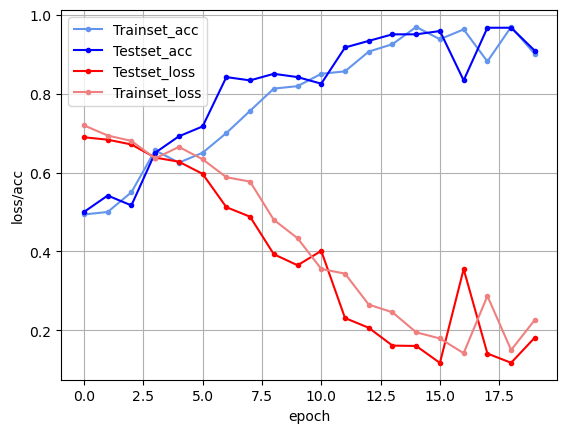

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='cornflowerblue', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='blue', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='lightcoral', label='Trainset_loss')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()